In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [27]:
df = pd.read_csv('out.csv')
df

,Unnamed: 0,User_id,Product_id,Rating,Date,Review,Label,reviewer_five_star_only,reviewer_one_star_only,User_num_reviews,...,user_avg_rating,user_std_rating,user_five_star_only,user_one_star_only,user_num_reviews,punctuation_count,title_word_count,upper_case_word_count,mcs,mnr
0,0,923,0,3,12/8/2014,the food snack selection popular greek dishes ...,-1,0,0,39,...,4.435897,0.852083,0,0,39,6,6,0,0.267834,2
1,1,923,880,3,12/8/2014,salads good prices good pesto lasagna good bit...,-1,0,0,39,...,4.435897,0.852083,0,0,39,5,4,0,0.267834,2
2,2,923,19,5,1/14/2014,the restaurant ground floor typical park slope...,-1,0,0,39,...,4.435897,0.852083,0,0,39,7,10,2,0.267834,2
3,3,923,717,5,1/14/2014,their pickled vegetable soul excellent we dump...,-1,0,0,39,...,4.435897,0.852083,0,0,39,11,8,0,0.267834,2
4,4,923,40,4,5/30/2014,really nice mousaka lovely dã cor inside a bit...,-1,0,0,39,...,4.435897,0.852083,0,0,39,5,5,3,0.267834,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253050,356990,159088,907,5,10/20/2009,love place â tastes like homemade latin food â...,1,0,0,2,...,4.000000,1.414214,0,0,2,18,17,10,0.085548,1
253051,357536,159634,909,4,8/4/2014,i ordered lunch special go happy it the sticky...,1,0,0,2,...,3.500000,0.707107,0,0,2,14,5,3,0.063792,1
253052,357537,159634,917,3,7/9/2013,the food good atmosphere bit popular scene y i...,1,0,0,2,...,3.500000,0.707107,0,0,2,39,11,4,0.063792,1
253053,358887,160984,920,5,5/5/2014,i m native texan i ve what s purported best ba...,1,0,0,2,...,3.000000,2.828427,0,0,2,42,24,6,0.067320,1


In [28]:
# undersampling
df = df.drop(columns=['Unnamed: 0','User_id', 'Product_id','Date','Review'])
sample_size = len(df[(df['Label'] == -1)])
authentic_reviews_df = df[df['Label'] == 1]
fake_reviews_df = df[df['Label'] == -1]

authentic_reviews_us_df = authentic_reviews_df.sample(sample_size)
under_sampled_df = pd.concat([authentic_reviews_us_df, fake_reviews_df], axis=0)

print("Under-Sampled Fake", len(under_sampled_df[(under_sampled_df['Label'] == -1)]))
print("Under-Sampled Authentic", len(under_sampled_df[(under_sampled_df['Label'] == 1)]))
under_sampled_df

Under-Sampled Fake 13312
Under-Sampled Authentic 13312


,Rating,Label,reviewer_five_star_only,reviewer_one_star_only,User_num_reviews,review_word_count,user_no_of_review,user_avg_num_words,user_avg_rating,user_std_rating,user_five_star_only,user_one_star_only,user_num_reviews,punctuation_count,title_word_count,upper_case_word_count,mcs,mnr
135827,5,1,0,0,4,71,4,53.250000,4.500000,0.577350,0,0,4,12,7,1,0.168638,2
24262,5,1,0,0,11,330,11,255.727273,4.363636,0.674200,0,0,11,50,41,13,0.210296,1
250621,4,1,0,0,2,44,2,73.500000,4.000000,0.000000,0,0,2,10,8,2,0.039105,1
40842,5,1,0,0,13,57,13,114.692308,4.153846,0.554700,0,0,13,13,4,2,0.162123,7
165859,1,1,0,0,5,188,5,134.800000,2.400000,1.516575,0,0,5,17,18,14,0.117292,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253013,5,-1,0,0,2,17,2,10.000000,3.500000,2.121320,0,0,2,10,6,1,0.000000,1
253035,4,-1,0,0,2,15,2,9.500000,4.500000,0.707107,0,0,2,2,3,1,0.000000,1
253036,5,-1,0,0,2,4,2,9.500000,4.500000,0.707107,0,0,2,1,1,0,0.000000,1
253037,5,-1,0,0,2,58,2,73.500000,4.500000,0.707107,0,0,2,10,7,0,0.124443,1


In [32]:
def semi_supervised_learning(df, model, algorithm, threshold=0.8, iterations=40):
    df = df.copy()
    print("Training "+algorithm+" Model")
    labels = df['Label']
    df = df.drop(columns=['Label']) 
    train_data, test_data, train_label, test_label = train_test_split(df, labels, test_size=0.25, random_state=42)

    test_data_copy = test_data.copy()
    test_label_copy = test_label.copy()

    all_labeled = False

    current_iteration = 0

    # param_grid = {
    #     'n_estimators': [10, 500],
    #     'max_features': ['auto', 'sqrt', 'log2'],
    #     'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    #     'criterion': ['gini', 'entropy']
    # }
    # grid_clf_acc = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    #
    # grid_clf_acc.fit(train_data, train_label)

    while not all_labeled and (current_iteration < iterations):
        print("Before train data length : ", len(train_data))
        print("Before test data length : ", len(test_data))
        current_iteration += 1
        model.fit(train_data, train_label)

        probabilities = model.predict_proba(test_data)
        pseudo_labels = model.predict(test_data)
        indices = np.argwhere(probabilities > threshold)
        print("rows above threshold : ", len(indices))
        for item in indices:
            train_data.loc[test_data.index[item[0]]] = test_data.iloc[item[0]]
            train_label.loc[test_data.index[item[0]]] = pseudo_labels[item[0]]
        test_data.drop(test_data.index[indices[:, 0]], inplace=True)
        test_label.drop(test_label.index[indices[:, 0]], inplace=True)
        # print("After train data length : ", len(train_data))
        # print("After test data length : ", len(test_data))
        print("--" * 20)

        if len(test_data) == 0:
            all_labeled = True
            print("Exiting loop")
            
    predicted_labels = model.predict(test_data_copy)

    # print('Best Params : ', grid_clf_acc.best_params_)
    print(algorithm + ' Model Results')
    print('--' * 20)
    print('Accuracy Score : ' + str(accuracy_score(test_label_copy, predicted_labels)))
    print('Precision Score : ' + str(precision_score(test_label_copy, predicted_labels, pos_label=-1)))
    print('Recall Score : ' + str(recall_score(test_label_copy, predicted_labels, pos_label=-1)))
    print('F1 Score : ' + str(f1_score(test_label_copy, predicted_labels, pos_label=-1)))
    print('Confusion Matrix : \n' + str(confusion_matrix(test_label_copy, predicted_labels)))
    plot_confusion_matrix(test_label_copy, predicted_labels, classes=[1, -1],
                          title=algorithm + ' Confusion Matrix').show()

In [33]:
def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes,
           yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return plt

Training Random Forest Model
Before train data length :  19968
Before test data length :  6656
[[0.65137471 0.34862529]
 [0.75602518 0.24397482]
 [0.84668817 0.15331183]
 ...
 [0.30353373 0.69646627]
 [0.00242234 0.99757766]
 [0.59600693 0.40399307]]
[[   1    0]
 [   2    0]
 [   3    1]
 ...
 [6649    0]
 [6651    0]
 [6654    1]]
rows above threshold :  3917


C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


----------------------------------------
Before train data length :  23885
Before test data length :  2739
[[0.69092599 0.30907401]
 [0.64434682 0.35565318]
 [0.51327641 0.48672359]
 ...
 [0.70981938 0.29018062]
 [0.27022105 0.72977895]
 [0.54102194 0.45897806]]
[[   4    0]
 [  21    0]
 [  23    0]
 [  24    0]
 [  32    1]
 [  35    0]
 [  39    0]
 [  46    1]
 [  49    1]
 [  52    0]
 [  53    0]
 [  62    0]
 [  75    0]
 [  77    0]
 [  84    0]
 [  87    0]
 [  99    0]
 [ 114    0]
 [ 118    0]
 [ 121    0]
 [ 133    0]
 [ 135    0]
 [ 137    0]
 [ 140    0]
 [ 146    0]
 [ 162    1]
 [ 165    0]
 [ 176    0]
 [ 177    0]
 [ 180    1]
 [ 181    1]
 [ 187    0]
 [ 192    0]
 [ 202    1]
 [ 203    0]
 [ 213    0]
 [ 222    1]
 [ 244    0]
 [ 245    1]
 [ 254    0]
 [ 259    1]
 [ 263    0]
 [ 268    1]
 [ 278    0]
 [ 294    0]
 [ 301    0]
 [ 302    1]
 [ 306    0]
 [ 310    0]
 [ 312    0]
 [ 319    0]
 [ 328    1]
 [ 333    0]
 [ 353    0]
 [ 356    0]
 [ 367    0]
 [ 369   

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


----------------------------------------
Before train data length :  24287
Before test data length :  2337
[[0.63483467 0.36516533]
 [0.6749242  0.3250758 ]
 [0.53550973 0.46449027]
 ...
 [0.36626236 0.63373764]
 [0.67826633 0.32173367]
 [0.56217179 0.43782821]]
[[  19    1]
 [  67    0]
 [  86    0]
 [  99    0]
 [ 128    1]
 [ 132    0]
 [ 136    0]
 [ 139    1]
 [ 155    0]
 [ 163    1]
 [ 172    1]
 [ 203    0]
 [ 234    0]
 [ 242    0]
 [ 259    0]
 [ 281    1]
 [ 293    0]
 [ 303    0]
 [ 307    0]
 [ 315    0]
 [ 317    1]
 [ 333    0]
 [ 337    1]
 [ 360    0]
 [ 362    0]
 [ 370    1]
 [ 381    0]
 [ 398    0]
 [ 413    1]
 [ 434    0]
 [ 475    0]
 [ 489    1]
 [ 506    0]
 [ 524    0]
 [ 540    0]
 [ 571    0]
 [ 572    0]
 [ 586    0]
 [ 619    0]
 [ 631    0]
 [ 654    0]
 [ 670    0]
 [ 676    0]
 [ 681    0]
 [ 695    0]
 [ 707    0]
 [ 720    0]
 [ 737    1]
 [ 753    0]
 [ 754    0]
 [ 766    0]
 [ 795    0]
 [ 807    0]
 [ 811    0]
 [ 857    1]
 [ 859    1]
 [ 867   

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


----------------------------------------
Before train data length :  24450
Before test data length :  2174
[[0.65031271 0.34968729]
 [0.69101409 0.30898591]
 [0.50971409 0.49028591]
 ...
 [0.38562538 0.61437462]
 [0.68712229 0.31287771]
 [0.56717383 0.43282617]]
[[   4    0]
 [  77    1]
 [ 122    0]
 [ 159    0]
 [ 203    0]
 [ 216    0]
 [ 243    0]
 [ 247    0]
 [ 256    0]
 [ 269    0]
 [ 289    1]
 [ 306    0]
 [ 315    0]
 [ 367    0]
 [ 400    0]
 [ 458    0]
 [ 466    0]
 [ 469    1]
 [ 473    0]
 [ 505    0]
 [ 522    0]
 [ 564    0]
 [ 574    0]
 [ 589    0]
 [ 597    0]
 [ 599    0]
 [ 617    0]
 [ 650    0]
 [ 655    1]
 [ 674    0]
 [ 744    0]
 [ 774    0]
 [ 786    0]
 [ 787    0]
 [ 829    0]
 [ 831    1]
 [ 842    0]
 [ 876    0]
 [ 902    0]
 [ 926    0]
 [ 941    1]
 [ 970    0]
 [ 971    0]
 [1015    0]
 [1018    1]
 [1036    0]
 [1073    0]
 [1120    0]
 [1125    0]
 [1147    0]
 [1154    0]
 [1182    0]
 [1198    1]
 [1223    1]
 [1227    0]
 [1228    0]
 [1249   

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


----------------------------------------
Before train data length :  24558
Before test data length :  2066
[[0.6715768  0.3284232 ]
 [0.68098391 0.31901609]
 [0.51702208 0.48297792]
 ...
 [0.35590895 0.64409105]
 [0.70229184 0.29770816]
 [0.55377142 0.44622858]]
[[  83    0]
 [ 102    0]
 [ 118    0]
 [ 155    0]
 [ 191    1]
 [ 213    0]
 [ 218    0]
 [ 228    0]
 [ 253    0]
 [ 266    0]
 [ 288    1]
 [ 298    0]
 [ 318    0]
 [ 388    0]
 [ 416    0]
 [ 451    0]
 [ 476    0]
 [ 477    0]
 [ 485    0]
 [ 501    0]
 [ 562    0]
 [ 572    0]
 [ 601    0]
 [ 624    0]
 [ 650    0]
 [ 671    1]
 [ 702    1]
 [ 740    0]
 [ 756    1]
 [ 790    0]
 [ 834    0]
 [ 912    0]
 [ 968    0]
 [ 980    0]
 [1050    0]
 [1062    0]
 [1069    0]
 [1079    1]
 [1093    0]
 [1136    0]
 [1197    1]
 [1263    1]
 [1283    0]
 [1291    1]
 [1337    0]
 [1409    0]
 [1516    0]
 [1581    0]
 [1618    0]
 [1634    1]
 [1674    0]
 [1721    0]
 [1729    1]
 [1756    1]
 [1837    0]
 [1840    1]
 [1841   

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


----------------------------------------
Before train data length :  24621
Before test data length :  2003
[[0.6899715  0.3100285 ]
 [0.68626417 0.31373583]
 [0.49086647 0.50913353]
 ...
 [0.6057981  0.3942019 ]
 [0.35670962 0.64329038]
 [0.57840148 0.42159852]]
[[  52    0]
 [  74    0]
 [  82    0]
 [  83    0]
 [  88    0]
 [ 105    1]
 [ 235    0]
 [ 239    0]
 [ 260    0]
 [ 294    1]
 [ 363    0]
 [ 520    0]
 [ 527    0]
 [ 533    0]
 [ 555    0]
 [ 600    0]
 [ 606    0]
 [ 660    0]
 [ 688    1]
 [ 711    1]
 [ 749    0]
 [ 789    0]
 [ 824    0]
 [ 830    0]
 [ 855    1]
 [ 875    0]
 [ 884    0]
 [ 933    1]
 [1007    0]
 [1082    1]
 [1086    0]
 [1091    0]
 [1132    1]
 [1320    0]
 [1413    0]
 [1422    1]
 [1465    0]
 [1471    0]
 [1516    1]
 [1570    1]
 [1710    0]
 [1776    0]
 [1828    0]
 [1840    0]
 [1850    0]
 [1858    1]
 [1894    0]
 [1909    0]]
rows above threshold :  48


C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


----------------------------------------
Before train data length :  24669
Before test data length :  1955
[[0.69723582 0.30276418]
 [0.69269726 0.30730274]
 [0.51758048 0.48241952]
 ...
 [0.60988404 0.39011596]
 [0.35085054 0.64914946]
 [0.5591039  0.4408961 ]]
[[  12    0]
 [ 104    0]
 [ 128    0]
 [ 141    0]
 [ 142    0]
 [ 174    0]
 [ 255    0]
 [ 361    1]
 [ 382    0]
 [ 466    0]
 [ 501    0]
 [ 537    0]
 [ 614    0]
 [ 648    0]
 [ 688    0]
 [ 761    0]
 [ 779    0]
 [ 790    0]
 [ 923    0]
 [1006    1]
 [1070    0]
 [1081    0]
 [1175    0]
 [1274    0]
 [1304    0]
 [1344    0]
 [1436    0]
 [1608    1]
 [1650    1]
 [1720    0]
 [1828    1]
 [1834    0]
 [1859    0]
 [1865    1]
 [1938    1]
 [1948    1]]
rows above threshold :  36


C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


----------------------------------------
Before train data length :  24705
Before test data length :  1919
[[0.69498672 0.30501328]
 [0.70530184 0.29469816]
 [0.51247257 0.48752743]
 ...
 [0.58871524 0.41128476]
 [0.35011684 0.64988316]
 [0.54081495 0.45918505]]
[[   1    0]
 [  46    0]
 [ 113    0]
 [ 169    1]
 [ 227    0]
 [ 258    0]
 [ 359    0]
 [ 367    0]
 [ 646    1]
 [ 651    1]
 [ 684    0]
 [ 771    0]
 [ 791    1]
 [ 794    1]
 [ 859    0]
 [ 875    0]
 [ 882    0]
 [ 943    0]
 [1076    1]
 [1144    0]
 [1183    0]
 [1262    0]
 [1287    0]
 [1320    0]
 [1332    0]
 [1339    0]
 [1448    0]
 [1450    0]
 [1493    0]
 [1575    0]
 [1767    0]
 [1853    0]]
rows above threshold :  32
----------------------------------------
Before train data length :  24737
Before test data length :  1887


C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[[0.68116617 0.31883383]
 [0.5217715  0.4782285 ]
 [0.40789485 0.59210515]
 ...
 [0.59074612 0.40925388]
 [0.35505557 0.64494443]
 [0.57366559 0.42633441]]
[[ 365    1]
 [ 381    1]
 [ 412    0]
 [ 453    0]
 [ 509    0]
 [ 629    1]
 [ 677    0]
 [ 738    0]
 [ 739    0]
 [ 825    0]
 [ 891    0]
 [ 906    0]
 [ 932    0]
 [ 948    0]
 [1070    0]
 [1078    0]
 [1085    0]
 [1102    0]
 [1214    0]
 [1389    0]
 [1429    0]
 [1480    0]
 [1516    0]
 [1567    0]
 [1611    1]
 [1696    0]
 [1846    1]
 [1862    0]
 [1869    0]]
rows above threshold :  29
----------------------------------------
Before train data length :  24766
Before test data length :  1858


C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[[0.68970649 0.31029351]
 [0.51548862 0.48451138]
 [0.40891111 0.59108889]
 ...
 [0.61660413 0.38339587]
 [0.37234967 0.62765033]
 [0.54140201 0.45859799]]
[[  20    0]
 [  38    0]
 [  90    0]
 [ 173    0]
 [ 227    1]
 [ 389    0]
 [ 427    0]
 [ 449    0]
 [ 512    0]
 [ 541    0]
 [ 559    0]
 [ 651    0]
 [ 699    0]
 [ 731    0]
 [ 732    0]
 [ 860    1]
 [1022    1]
 [1045    0]
 [1191    0]
 [1236    0]
 [1508    1]
 [1545    0]
 [1672    0]
 [1697    0]
 [1769    0]]
rows above threshold :  25
----------------------------------------
Before train data length :  24791
Before test data length :  1833


C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[[0.67069581 0.32930419]
 [0.50929495 0.49070505]
 [0.41358594 0.58641406]
 ...
 [0.59079443 0.40920557]
 [0.35264825 0.64735175]
 [0.55082411 0.44917589]]
[[  89    0]
 [ 430    0]
 [ 511    0]
 [ 983    1]
 [ 994    1]
 [1008    0]
 [1079    0]
 [1227    0]
 [1505    0]
 [1550    0]
 [1653    0]
 [1689    0]
 [1742    0]
 [1808    0]]
rows above threshold :  14
----------------------------------------
Before train data length :  24805
Before test data length :  1819


C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[[0.68423766 0.31576234]
 [0.50787001 0.49212999]
 [0.39832914 0.60167086]
 ...
 [0.62030732 0.37969268]
 [0.39921931 0.60078069]
 [0.55486507 0.44513493]]
[[  76    0]
 [ 132    0]
 [ 377    1]
 [ 421    0]
 [ 715    1]
 [ 787    0]
 [ 989    0]
 [1132    0]
 [1398    0]
 [1449    0]
 [1618    0]
 [1640    0]
 [1693    0]
 [1738    0]]
rows above threshold :  14
----------------------------------------
Before train data length :  24819
Before test data length :  1805


C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[[0.69722741 0.30277259]
 [0.50279155 0.49720845]
 [0.41332562 0.58667438]
 ...
 [0.60911638 0.39088362]
 [0.38860511 0.61139489]
 [0.55364794 0.44635206]]
[[ 145    0]
 [ 471    0]
 [ 478    0]
 [ 593    1]
 [ 847    0]
 [1442    1]
 [1449    1]
 [1465    0]
 [1627    1]
 [1647    0]
 [1662    0]]
rows above threshold :  11
----------------------------------------
Before train data length :  24830
Before test data length :  1794


C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[[0.69623778 0.30376222]
 [0.51618988 0.48381012]
 [0.3825346  0.6174654 ]
 ...
 [0.60883004 0.39116996]
 [0.36602797 0.63397203]
 [0.57918719 0.42081281]]
[[ 210    0]
 [ 509    1]
 [ 722    1]
 [1032    0]
 [1128    0]
 [1394    1]
 [1411    1]
 [1529    0]
 [1555    1]
 [1622    0]
 [1653    0]]
rows above threshold :  11
----------------------------------------
Before train data length :  24841
Before test data length :  1783


C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[[0.68322448 0.31677552]
 [0.50620065 0.49379935]
 [0.41900797 0.58099203]
 ...
 [0.58516358 0.41483642]
 [0.35368857 0.64631143]
 [0.5747715  0.4252285 ]]
[[  59    1]
 [ 131    1]
 [ 197    1]
 [ 593    1]
 [ 826    0]
 [1066    0]
 [1450    1]
 [1610    0]
 [1743    0]]
rows above threshold :  9
----------------------------------------


C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Random Forest Model Results
----------------------------------------
Accuracy Score : 0.79296875
Precision Score : 0.7568356782585612
Recall Score : 0.8605493510413522
F1 Score : 0.8053672316384181
Confusion Matrix : 
[[2851  462]
 [ 916 2427]]


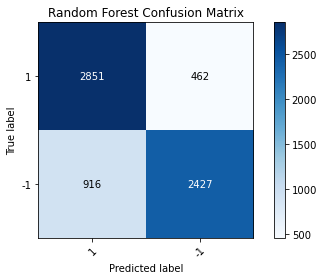

Training Naive Bayes Model
Before train data length :  19968
Before test data length :  6656
[[8.90312856e-01 1.09687144e-01]
 [9.99997478e-01 2.52224550e-06]
 [9.61749187e-01 3.82508129e-02]
 ...
 [8.33095427e-01 1.66904573e-01]
 [2.26857592e-10 1.00000000e+00]
 [3.79247585e-01 6.20752415e-01]]
[[   0    0]
 [   1    0]
 [   2    0]
 ...
 [6652    0]
 [6653    0]
 [6654    1]]
rows above threshold :  5987


C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_inde

----------------------------------------
Before train data length :  25955
Before test data length :  669
[[0.60049867 0.39950133]
 [0.82056355 0.17943645]
 [0.73732022 0.26267978]
 ...
 [0.83415682 0.16584318]
 [0.82510837 0.17489163]
 [0.49723215 0.50276785]]
[[  1   0]
 [  2   0]
 [  3   0]
 [  4   0]
 [  5   1]
 [  7   0]
 [  8   0]
 [ 11   1]
 [ 12   0]
 [ 13   0]
 [ 16   0]
 [ 18   0]
 [ 22   0]
 [ 23   0]
 [ 24   0]
 [ 25   0]
 [ 27   0]
 [ 29   0]
 [ 30   0]
 [ 32   0]
 [ 34   0]
 [ 35   0]
 [ 37   0]
 [ 38   0]
 [ 41   0]
 [ 42   0]
 [ 43   0]
 [ 44   0]
 [ 46   0]
 [ 49   0]
 [ 50   0]
 [ 52   0]
 [ 54   0]
 [ 55   0]
 [ 58   0]
 [ 63   0]
 [ 68   0]
 [ 70   0]
 [ 71   0]
 [ 72   0]
 [ 73   1]
 [ 74   0]
 [ 76   0]
 [ 79   0]
 [ 82   0]
 [ 83   0]
 [ 85   0]
 [ 91   0]
 [ 94   0]
 [ 95   0]
 [ 96   0]
 [ 98   0]
 [101   0]
 [104   0]
 [107   0]
 [109   0]
 [111   0]
 [112   0]
 [113   0]
 [115   0]
 [119   0]
 [120   0]
 [121   0]
 [123   0]
 [128   0]
 [131   0]
 [132   0]
 

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


----------------------------------------
Before train data length :  26276
Before test data length :  348
[[0.63306593 0.36693407]
 [0.63645135 0.36354865]
 [0.66080297 0.33919703]
 [0.56737207 0.43262793]
 [0.51588895 0.48411105]
 [0.59370172 0.40629828]
 [0.55191707 0.44808293]
 [0.68232138 0.31767862]
 [0.71068579 0.28931421]
 [0.72600035 0.27399965]
 [0.72614475 0.27385525]
 [0.51387411 0.48612589]
 [0.67606866 0.32393134]
 [0.71795166 0.28204834]
 [0.56914801 0.43085199]
 [0.44684116 0.55315884]
 [0.53110783 0.46889217]
 [0.70465381 0.29534619]
 [0.65087246 0.34912754]
 [0.64943913 0.35056087]
 [0.57382403 0.42617597]
 [0.62954461 0.37045539]
 [0.32466211 0.67533789]
 [0.42073456 0.57926544]
 [0.69246512 0.30753488]
 [0.57009763 0.42990237]
 [0.6021838  0.3978162 ]
 [0.63617671 0.36382329]
 [0.45184888 0.54815112]
 [0.56703215 0.43296785]
 [0.64948375 0.35051625]
 [0.65115237 0.34884763]
 [0.33951171 0.66048829]
 [0.60581378 0.39418622]
 [0.53730301 0.46269699]
 [0.47997702 0.5200

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\U

----------------------------------------
Before train data length :  26314
Before test data length :  310
[[0.63717885 0.36282115]
 [0.63991306 0.36008694]
 [0.66509941 0.33490059]
 [0.56909947 0.43090053]
 [0.5207378  0.4792622 ]
 [0.59681682 0.40318318]
 [0.55666439 0.44333561]
 [0.68550346 0.31449654]
 [0.51822575 0.48177425]
 [0.68022068 0.31977932]
 [0.57353732 0.42646268]
 [0.45193179 0.54806821]
 [0.53493333 0.46506667]
 [0.6536771  0.3463229 ]
 [0.65016492 0.34983508]
 [0.57859843 0.42140157]
 [0.63351964 0.36648036]
 [0.326642   0.673358  ]
 [0.42362422 0.57637578]
 [0.69636337 0.30363663]
 [0.57452889 0.42547111]
 [0.60685336 0.39314664]
 [0.6406938  0.3593062 ]
 [0.45672943 0.54327057]
 [0.57148614 0.42851386]
 [0.65350212 0.34649788]
 [0.65567151 0.34432849]
 [0.3391151  0.6608849 ]
 [0.60922875 0.39077125]
 [0.53993716 0.46006284]
 [0.48047962 0.51952038]
 [0.39445524 0.60554476]
 [0.35236374 0.64763626]
 [0.60205301 0.39794699]
 [0.66836809 0.33163191]
 [0.60325187 0.3967

[]
rows above threshold :  0
----------------------------------------
Before train data length :  26318
Before test data length :  306
[[0.63753176 0.36246824]
 [0.64032284 0.35967716]
 [0.66551635 0.33448365]
 [0.56919216 0.43080784]
 [0.5212046  0.4787954 ]
 [0.59726508 0.40273492]
 [0.55719764 0.44280236]
 [0.68575499 0.31424501]
 [0.51865868 0.48134132]
 [0.68064223 0.31935777]
 [0.57394058 0.42605942]
 [0.45245118 0.54754882]
 [0.53528191 0.46471809]
 [0.65404757 0.34595243]
 [0.65034433 0.34965567]
 [0.57905718 0.42094282]
 [0.63395085 0.36604915]
 [0.32686507 0.67313493]
 [0.42373834 0.57626166]
 [0.69669995 0.30330005]
 [0.57496551 0.42503449]
 [0.60729486 0.39270514]
 [0.64111732 0.35888268]
 [0.45721416 0.54278584]
 [0.57192206 0.42807794]
 [0.65394253 0.34605747]
 [0.65611628 0.34388372]
 [0.33881199 0.66118801]
 [0.60964722 0.39035278]
 [0.54009464 0.45990536]
 [0.48060796 0.51939204]
 [0.39485508 0.60514492]
 [0.3525056  0.6474944 ]
 [0.60249733 0.39750267]
 [0.66880517 0.

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Owner\anaconda3\lib


[]
rows above threshold :  0
----------------------------------------
Before train data length :  26318
Before test data length :  306
[[0.63753176 0.36246824]
 [0.64032284 0.35967716]
 [0.66551635 0.33448365]
 [0.56919216 0.43080784]
 [0.5212046  0.4787954 ]
 [0.59726508 0.40273492]
 [0.55719764 0.44280236]
 [0.68575499 0.31424501]
 [0.51865868 0.48134132]
 [0.68064223 0.31935777]
 [0.57394058 0.42605942]
 [0.45245118 0.54754882]
 [0.53528191 0.46471809]
 [0.65404757 0.34595243]
 [0.65034433 0.34965567]
 [0.57905718 0.42094282]
 [0.63395085 0.36604915]
 [0.32686507 0.67313493]
 [0.42373834 0.57626166]
 [0.69669995 0.30330005]
 [0.57496551 0.42503449]
 [0.60729486 0.39270514]
 [0.64111732 0.35888268]
 [0.45721416 0.54278584]
 [0.57192206 0.42807794]
 [0.65394253 0.34605747]
 [0.65611628 0.34388372]
 [0.33881199 0.66118801]
 [0.60964722 0.39035278]
 [0.54009464 0.45990536]
 [0.48060796 0.51939204]
 [0.39485508 0.60514492]
 [0.3525056  0.6474944 ]
 [0.60249733 0.39750267]
 [0.66880517 0

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Owner\anaconda3\lib

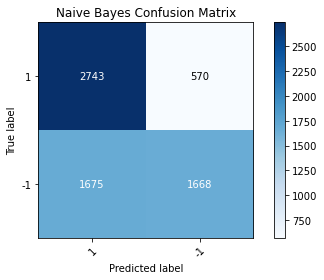

In [34]:
rf = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=14, max_features='auto', n_estimators=500)
nb = GaussianNB()

semi_supervised_learning(under_sampled_df, model=rf, threshold=0.7, iterations=15, algorithm='Random Forest')
semi_supervised_learning(under_sampled_df, model=nb, threshold=0.7, iterations=15, algorithm='Naive Bayes')